In [1]:
import cv2 as cv
import numpy as np
import os

In [2]:
#Getting the names of cricketers based on folder names
people=[]
for i in os.listdir(r'D:\programming languages\OpenCV\Face recognition project 1\photoes\Train'):
    people.append(i)
people

['MS Dhoni', 'Rohit Sharma', 'Shikhar Dhawan', 'Suresh Raina', 'Virat Kohli']

In [3]:
features=[]
labels=[]
people=['Rohit Sharma','Suresh Raina','MS Dhoni','Virat Kohli','Shikhar Dhawan']
DIR='D:\programming languages\OpenCV\Face recognition project 1\photoes\Train'
haar_cascade=cv.CascadeClassifier(r'D:\programming languages\OpenCV\HaarCascades\haarcascade_frontalface_default.xml')
def create_train():
    for person in people:
        path=os.path.join(DIR,person)
        label=people.index(person)
        for image in os.listdir(path):
            image_path=os.path.join(path,image)
            img=cv.imread(image_path)
            gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
            face_rect=haar_cascade.detectMultiScale(gray,1.1,1)
            for x,y,w,h in face_rect:
                face_roi1=gray[y:y+h,x:x+w]
                face_roi=cv.resize(face_roi1,(30,30))
                features.append(face_roi)
                labels.append(label)
            
create_train()
len(features),len(labels)
    

(182, 182)

In [5]:
features[15].shape

(30, 30)

In [6]:
#training the model
face_recognizer=cv.face.LBPHFaceRecognizer_create()
features=np.array(features,dtype='object')
labels=np.array(labels)
face_recognizer.train(features,labels)

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'train'
> Overload resolution failed:
>  - Can't parse 'src'. Sequence item with index 0 has a wrong type
>  - Can't parse 'src'. Sequence item with index 0 has a wrong type


In [7]:
def rescaleFrame(frame,scale=2):#scale=0.75 --> image size decreased to 75%
    height=int(frame.shape[0]*scale)
    width=int(frame.shape[1]*scale)
    dimensions=(width,height)
    return cv.resize(frame,dimensions,interpolation=cv.INTER_AREA)

In [8]:
def predict_face(path):
    img1=cv.imread(path)
    img=rescaleFrame(img1)
    gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    haar_cascade=cv.CascadeClassifier(r'D:\programming languages\OpenCV\HaarCascades\haarcascade_frontalface_default.xml')
    face_rect=haar_cascade.detectMultiScale(gray,1.1,1)
    for x,y,w,h in face_rect:
        face_roi=gray[y:y+h,x:x+w]
        predicted_label,confidence=face_recognizer.predict(face_roi)
        print(f"{people[predicted_label]} with confidence : {confidence}")
        cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        cv.putText(img,str(people[predicted_label]),(20,20),cv.FONT_HERSHEY_COMPLEX,1.0,(0,255,0),2)
        break
    cv.imshow("Detected Face",img)
    cv.waitKey(0)
    cv.destroyAllWindows()
        

In [9]:
path=r'D:\programming languages\OpenCV\Face recognition project 1\photoes\Test\MS Dhoni\images (11).jpg'
predict_face(path)

Shikhar Dhawan with confidence : 136.88797477177994


In [5]:
features

[array([[213, 195,  68,  70,  50,  57, 151, 188, 195, 204, 151, 125, 143,
         141, 122, 112, 119, 148, 151, 157, 169, 180, 186, 186, 183, 165,
          83,  37,  73,  76],
        [218, 162,  57,  67,  60,  99, 161, 191, 198, 201, 187, 191, 178,
         158, 149, 160, 171, 189, 193, 197, 203, 207, 205, 199, 193, 181,
         120,  41,  75,  36],
        [229, 156,  60,  61,  83, 155, 184, 199, 197, 185, 201, 204, 183,
         164, 161, 175, 185, 193, 203, 206, 210, 211, 207, 200, 194, 196,
         160,  62,  59,  25],
        [234, 165,  61,  58, 109, 184, 200, 199, 188, 176, 196, 196, 194,
         192, 187, 187, 191, 196, 185, 185, 189, 191, 190, 188, 185, 191,
         180, 107,  48,  44],
        [227, 155,  42,  60, 126, 179, 194, 187, 184, 189, 201, 191, 195,
         202, 196, 189, 192, 195, 186, 185, 185, 185, 184, 182, 180, 179,
         183, 131,  56,  58],
        [221, 163,  33,  65, 130, 171, 186, 182, 191, 203, 207, 208, 207,
         213, 208, 202, 207, 208, 20

In [21]:
for count in range(len(features)):
    features[count]=features[count].flatten()

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled=scaler.fit_transform(features)

In [99]:
scaled[56].shape

(900,)

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test=train_test_split(scaled,labels,test_size=0.2)

In [81]:
model=LogisticRegression()

In [82]:
model.fit(x_train,y_train)

C:\Users\Sharath chandra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
model.score(x_test,y_test)

0.5135135135135135

In [96]:
def predict_using_ML(path):
    img=cv.imread(path)
    gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    face_rect=haar_cascade.detectMultiScale(gray,1.1,3)
    for x,y,w,h in face_rect:
        face_roi1=gray[y:y+h,x:x+w]
        face_roi=cv.resize(face_roi1,(30,30))
        face_roi=face_roi.flatten()
        print("shape : ",face_roi.shape)
        print(face_roi)
        predict_scaled=face_roi/255
        print("predicted")
        print(predict_scaled)
        predicted=model.predict(predict_scaled)
        cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        cv.putText(img,str(people[predicted]),(20,20),cv.FONT_HERSHEY_COMPLEX,1.0,(0,255,0),2)
        cv.imshow("Predicted",img)
        break

In [97]:
path=r'D:\programming languages\OpenCV\Face recognition project 1\photoes\Test\MS Dhoni\images (11).jpg'
predict_using_ML(path)

shape :  (900,)
[111 108 116 110  99 248 245 237 237 237 228 209 173 143 141 165 212 231
 237 231 235 241 239 238 243 141 138 124 117 111 101 102 108  98 197 246
 238 244 239 180  95  78  56  46  32  39  39  97 207 244 233 240 242 239
 244 230 116 109 103  97  95 104  89  99 238 238 240 224 141  76  24  38
  37  30  32  33  34  28  19 106 243 237 233 243 242 229 115 108 102  96
  96 103  99 197 242 241 218 120  48  22  34  43  44  35  36  41  46  46
  39  22  42 217 245 236 244 243  95 113 103 100  92  93  73 245 233 216
 100  30  23  32  40  37  40  50  52  46  46  48  43  51  49  38 198 247
 211 244 141 106 100 101  94  99 100 246 225 107  32  28  36  41  41  51
  47  44  49  49  50  56  53  52  42  39  33 191 243 223 234  96 106 107
  93  90 141 245 103  43  34  38  42  49  38  44  67  88  91  74  56  43
  47  49  53  35  40  40 194 242 235 116 113 107  87  88 144 198  71  26
  33  51  42  42 104 163 196 196 195 194 177 148  90  48  47  46  47  40
  38 178 162 192 107 120  85  84 19

ValueError: X has 1 features per sample; expecting 900

In [87]:
predicted_scaled

NameError: name 'predicted_scaled' is not defined

In [84]:
features[69].shape

(900,)

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
DIR=r"D:\programming languages\datasets\CelebrityImageClassificationCropped"
people=[]
for person in os.listdir(DIR):
    people.append(person)
people

['Lionel Messi',
 'Maria Sharapova',
 'Roger Federer',
 'Serena Williams',
 'Virat Kohli']

In [3]:
features=[]
labels=[]
shapes=[]
for person in people:
    path=os.path.join(DIR,person)
    for image in os.listdir(path):
        labels.append(people.index(person))
        image_path=os.path.join(path,image)
        img=cv.imread(image_path)
        gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
        shapes.append(gray.shape)
        resized=cv.resize(gray,(62,62))
        features.append(resized)

In [4]:
len(features)

168

In [5]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [6]:
min(shapes)

(62, 62)

In [7]:
max(shapes)

(1684, 1684)

In [8]:
shapes

[(179, 179),
 (187, 187),
 (106, 106),
 (196, 196),
 (108, 108),
 (211, 211),
 (203, 203),
 (500, 500),
 (278, 278),
 (347, 347),
 (102, 102),
 (117, 117),
 (83, 83),
 (197, 197),
 (139, 139),
 (184, 184),
 (285, 285),
 (157, 157),
 (255, 255),
 (167, 167),
 (198, 198),
 (119, 119),
 (105, 105),
 (960, 960),
 (251, 251),
 (157, 157),
 (846, 846),
 (499, 499),
 (198, 198),
 (138, 138),
 (205, 205),
 (176, 176),
 (1684, 1684),
 (111, 111),
 (105, 105),
 (120, 120),
 (93, 93),
 (94, 94),
 (64, 64),
 (214, 214),
 (77, 77),
 (122, 122),
 (273, 273),
 (213, 213),
 (334, 334),
 (487, 487),
 (783, 783),
 (107, 107),
 (186, 186),
 (186, 186),
 (164, 164),
 (175, 175),
 (414, 414),
 (677, 677),
 (129, 129),
 (308, 308),
 (298, 298),
 (229, 229),
 (200, 200),
 (233, 233),
 (290, 290),
 (150, 150),
 (157, 157),
 (326, 326),
 (135, 135),
 (202, 202),
 (138, 138),
 (331, 331),
 (820, 820),
 (289, 289),
 (153, 153),
 (304, 304),
 (143, 143),
 (161, 161),
 (192, 192),
 (491, 491),
 (491, 491),
 (176, 

In [9]:
features

[array([[ 86, 105,  83, ...,  20,  19,  18],
        [ 93, 107,  86, ...,  28,  24,  22],
        [107,  90,  71, ...,  52,  31,  34],
        ...,
        [ 18,  19,  22, ...,  12,  13,  14],
        [ 17,  18,  20, ...,  13,  13,  14],
        [ 15,  16,  19, ...,  14,  13,  12]], dtype=uint8),
 array([[ 16,  24,  65, ...,  16,  29,  34],
        [ 15,  14,  60, ...,  23,  30,  28],
        [ 18,  22,  26, ...,  22,  39,  17],
        ...,
        [146, 144, 142, ...,  22,  21,  27],
        [140, 141, 138, ...,  38,  24,  19],
        [137, 137, 136, ...,  23,  25,  23]], dtype=uint8),
 array([[ 30,  49,  76, ..., 118, 107,  83],
        [ 28,  42,  54, ..., 111, 124,  99],
        [ 26,  26,  37, ...,  90, 113,  84],
        ...,
        [ 41,  42, 147, ..., 151, 146, 140],
        [ 42, 201, 250, ..., 155, 150, 144],
        [120, 249, 253, ..., 162, 158, 152]], dtype=uint8),
 array([[ 68,  68,  66, ..., 108,  93,  67],
        [ 68,  68,  66, ..., 132, 100,  61],
        [ 70,  6

In [10]:
X=np.array(features)
X

array([[[ 86, 105,  83, ...,  20,  19,  18],
        [ 93, 107,  86, ...,  28,  24,  22],
        [107,  90,  71, ...,  52,  31,  34],
        ...,
        [ 18,  19,  22, ...,  12,  13,  14],
        [ 17,  18,  20, ...,  13,  13,  14],
        [ 15,  16,  19, ...,  14,  13,  12]],

       [[ 16,  24,  65, ...,  16,  29,  34],
        [ 15,  14,  60, ...,  23,  30,  28],
        [ 18,  22,  26, ...,  22,  39,  17],
        ...,
        [146, 144, 142, ...,  22,  21,  27],
        [140, 141, 138, ...,  38,  24,  19],
        [137, 137, 136, ...,  23,  25,  23]],

       [[ 30,  49,  76, ..., 118, 107,  83],
        [ 28,  42,  54, ..., 111, 124,  99],
        [ 26,  26,  37, ...,  90, 113,  84],
        ...,
        [ 41,  42, 147, ..., 151, 146, 140],
        [ 42, 201, 250, ..., 155, 150, 144],
        [120, 249, 253, ..., 162, 158, 152]],

       ...,

       [[175, 170, 171, ...,  29,  28,  30],
        [172, 171, 173, ...,  29,  28,  27],
        [172, 172, 176, ...,  22,  22,  22

In [11]:
X.shape

(168, 62, 62)

In [12]:
x=X.reshape(-1,62*62)
x.shape

(168, 3844)

In [13]:
y=np.array(labels)
y.shape

(168,)

In [14]:
def plot(index):
    plt.imshow(X[index])
    plt.title(people[y[index]])
    plt.show()

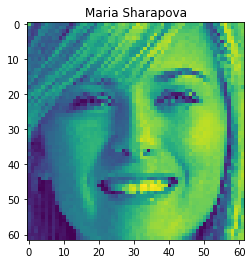

In [15]:
plot(45)

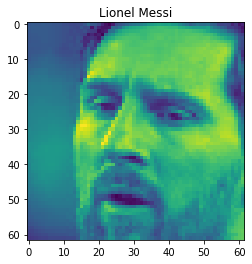

In [16]:
plot(10)

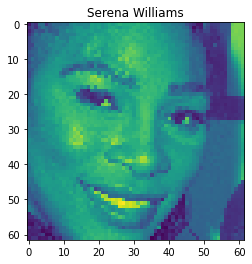

In [17]:
plot(100)

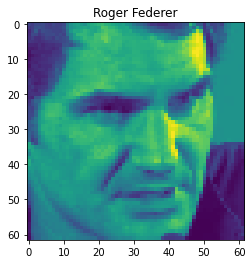

In [18]:
plot(89)

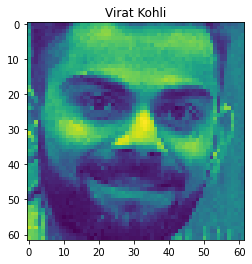

In [19]:
plot(134)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model=LogisticRegression(max_iter=1000)

In [22]:
model.fit(x,y)

LogisticRegression(max_iter=1000)

In [23]:
def predict(path):
    img=cv.imread(path)
    gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    haar_cascade=cv.CascadeClassifier(r'D:\programming languages\OpenCV\HaarCascades\haarcascade_frontalface_default.xml')
    face_rect=haar_cascade.detectMultiScale(gray,1.1,1)
    for x,y,w,h in face_rect:
        face_roi=gray[y:y+h,x:x+w]
        resized=cv.resize(face_roi,(62,62))
        x_var=resized.reshape(-1,62*62)
        predicted_label=model.predict(x_var)
        cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        cv.putText(img,str(people[predicted_label[0]]),(20,20),cv.FONT_HERSHEY_COMPLEX,1.0,(0,255,0),2)
        break
    cv.imshow("Predicted image",img)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [25]:
path=r'C:\Users\Sharath chandra\OneDrive\Desktop\test\329fe1788c0ad306705372fee5e494db.jpg'
predict(path)

In [72]:
import tensorflow as tf
from tensorflow import keras

In [80]:
model=keras.Sequential([
    keras.layers.Dense(1000,input_shape=(3844,),activation='relu'),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(250,activation='relu'),
    keras.layers.Dense(125,activation='relu'),
    keras.layers.Dense(75,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(25,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(5,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x,y,epochs=50)

Epoch 1/50
6/6 [==============================] - 1s 52ms/step - loss: 389.5570 - accuracy: 0.1964
Epoch 2/50
6/6 [==============================] - 0s 49ms/step - loss: 98.5107 - accuracy: 0.2202
Epoch 3/50
6/6 [==============================] - 0s 42ms/step - loss: 56.1064 - accuracy: 0.2262
Epoch 4/50
6/6 [==============================] - 0s 45ms/step - loss: 76.5724 - accuracy: 0.1786
Epoch 5/50
6/6 [==============================] - 0s 47ms/step - loss: 41.4221 - accuracy: 0.1548
Epoch 6/50
6/6 [==============================] - 0s 47ms/step - loss: 28.0978 - accuracy: 0.2321
Epoch 7/50
6/6 [==============================] - 0s 48ms/step - loss: 25.6542 - accuracy: 0.2083
Epoch 8/50
6/6 [==============================] - 0s 55ms/step - loss: 29.2781 - accuracy: 0.2381
Epoch 9/50
6/6 [==============================] - 0s 62ms/step - loss: 12.8899 - accuracy: 0.1905
Epoch 10/50
6/6 [==============================] - 0s 42ms/step - loss: 13.6414 - accuracy: 0.1786
Epoch 11/50
6/6 [=